In [77]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [78]:
data = pd.read_csv("./data/survey_results_public.csv")

In [ ]:
data.head()

In [ ]:
data = data.set_index("Respondent")

მოცემულ ანალიზში ვნახავთ რომელი პროგრამირების ენები და ბაზები არის ყველაზე პოპულარული იმ ადამიანებს შორის რომელთა შემოსავალი მოქცეულია 100K სა და საუკეთესო 93%(იმისთვის რომ გამოვრიცხოთ არარეალური შემოსავლები)ს შორის. ასევე რა არის მათი განათლების დონე და სპეციალობა.
მეორე ნაწილში შევადარებ სქესის მიხედვით ხელფასის საშუალოს, მედიანურს და დაუსაქმებელი ადამიანების რაოდენობას.

In [ ]:
for col in data:
    if data[col].dtype == "object":
        data[col] = data[col].fillna("None")
    else:
        data[col] = data[col].fillna(0)

In [ ]:
STRING_DELIMITER = ";"

In [ ]:
def get_column_unique_values(data: pd.DataFrame, column_name: str) -> set:
    unique_values = set()
    col_values = data[column_name].unique()
    
    for col_value in col_values:
        for val in col_value.split(STRING_DELIMITER):
            unique_values.add(val)
            
    return list(unique_values)

In [ ]:
best_93 = data["CompTotal"].quantile(0.93)
filter_salary_over_100k = (data["CompTotal"] > 100_000) & (data["CompTotal"] < best_93)

In [ ]:
filtered_data = data[filter_salary_over_100k]

In [ ]:
def count_values(data: pd.DataFrame, column_name: str) -> dict:
    all_values = get_column_unique_values(data, column_name)
    counter = dict.fromkeys(all_values, 0)
    
    for col in data[column_name]:
        for val in col.split(STRING_DELIMITER):
            counter[val] += 1
     
    return counter
    

In [ ]:
top_10_languages = sorted(count_values(filtered_data, "LanguageWorkedWith").items(), key=lambda x:x[1], reverse=True)[:-10]

In [81]:
def build_chart(count_dict: dict, xLabel: str, yLabel: str, title: str):
    fig, ax = plt.subplots()
    labels = list(zip(*count_dict))[0]
    values = list(zip(*count_dict))[1]

    ax.bar(labels, values)

    plt.xticks(range(len(values)), rotation="vertical")
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(title)


    plt.show()

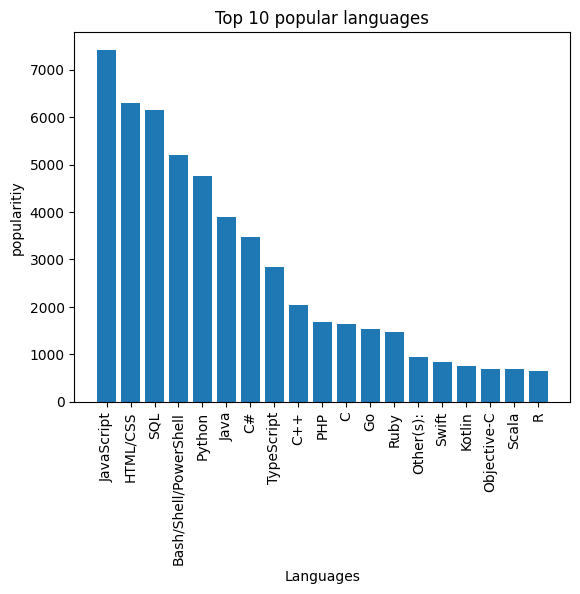

In [85]:
build_chart(top_10_languages, "Languages", "popularitiy", "Top 10 popular languages")

In [86]:
top_10_dbs = sorted(count_values(filtered_data, "DatabaseWorkedWith").items(), key=lambda x:x[1], reverse=True)[:-10]

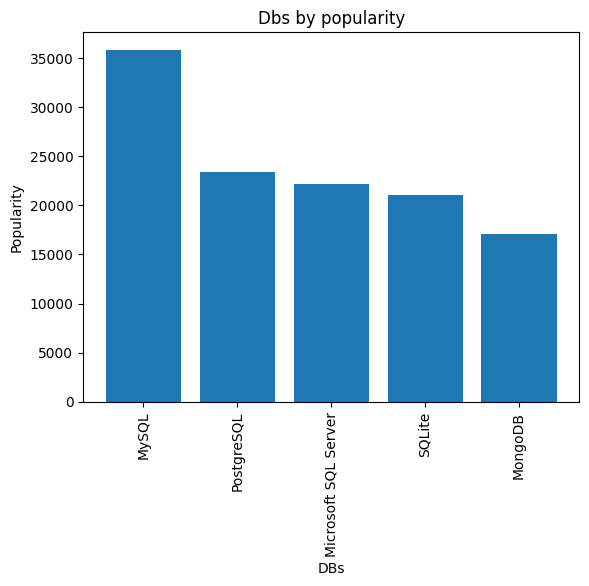

In [87]:
build_chart(top_10_dbs, "DBs", "Popularity", "Dbs by popularity")

In [88]:
majors = sorted(count_values(filtered_data, "UndergradMajor").items(), key=lambda x:x[1], reverse=True)[:-10]

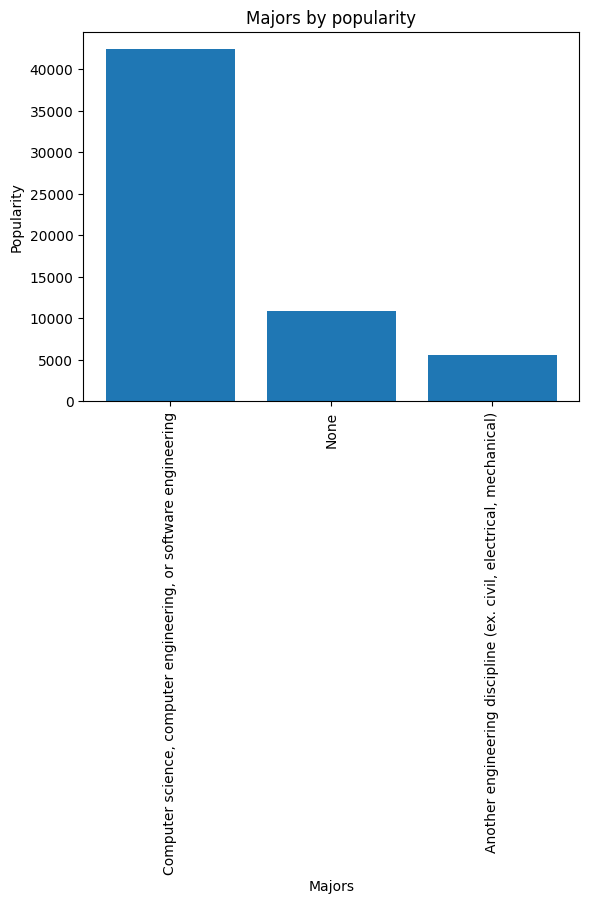

In [89]:
build_chart(majors, "Majors", "Popularity", "Majors by popularity")

In [90]:
edLevel = sorted(count_values(filtered_data, "EdLevel").items(), key=lambda x:x[1], reverse=True)[:10]

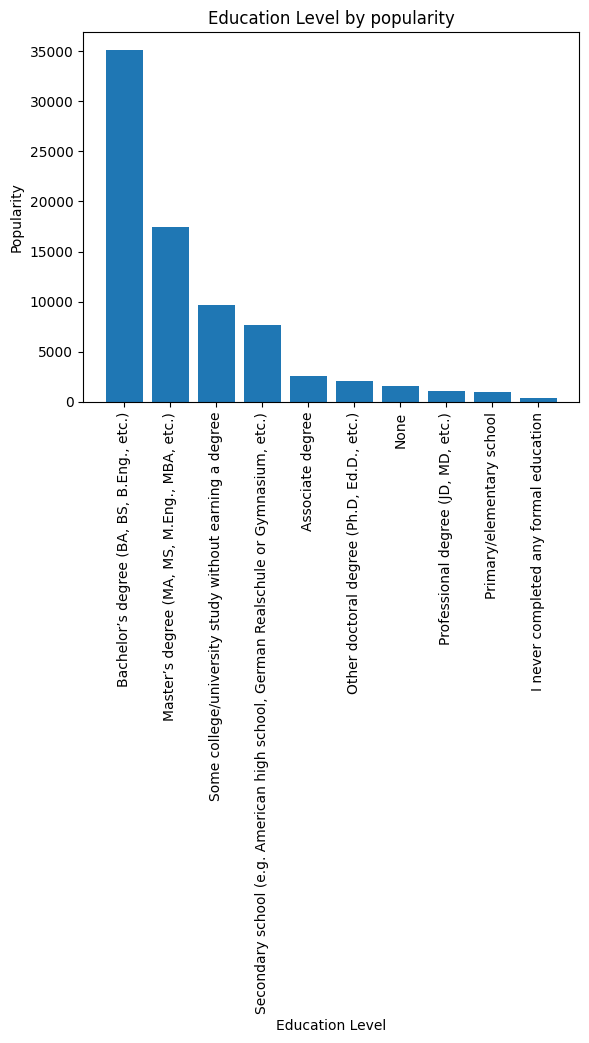

In [91]:
build_chart(edLevel, "Education Level", "Popularity", "Education Level by popularity")

In [92]:
filter_salary_over_0 = (data["CompTotal"] > 0) & (data["CompTotal"] < best_93)
filtered_data2 = data[filter_salary_over_0]

In [93]:
women_developers = filtered_data2[filtered_data2["Gender"] == "Woman"]
male_develoeprs = filtered_data2[filtered_data2["Gender"] == "Man"]

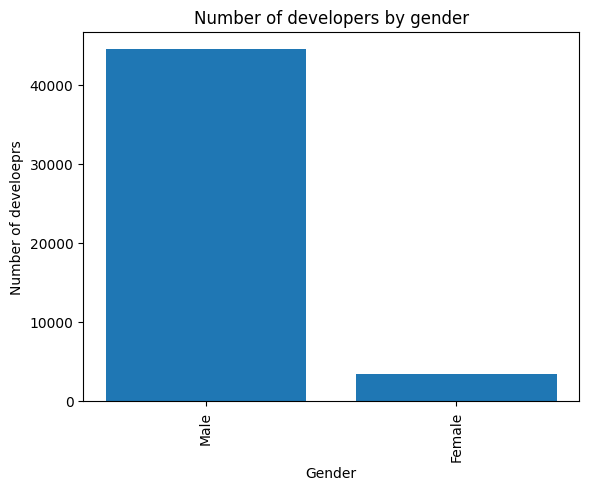

In [95]:
count_male_developers = male_develoeprs.shape[0]
count_female_developers = women_developers.shape[0]
count_genders = [
    ("Male", count_male_developers),
    ("Female", count_female_developers)
]
build_chart(count_genders, "Gender", "Number of develoeprs", "Number of developers by gender")

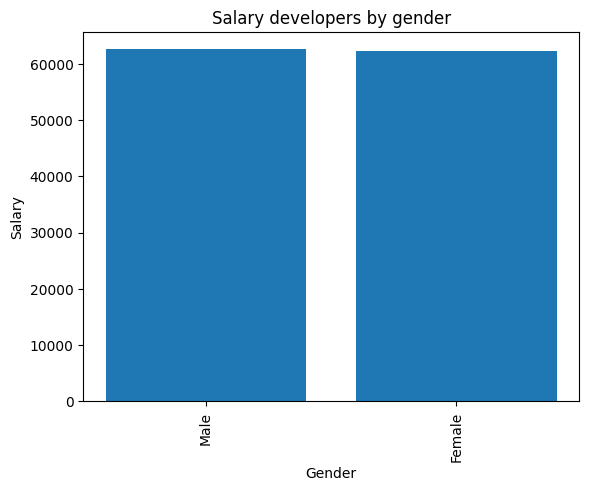

In [96]:
male_salary_mean = male_develoeprs["CompTotal"].mean()
female_salary_mean = women_developers["CompTotal"].mean()
count_genders = [
    ("Male", male_salary_mean),
    ("Female", female_salary_mean)
]
build_chart(count_genders, "Gender", "Salary", "Mean salary of developers by gender")

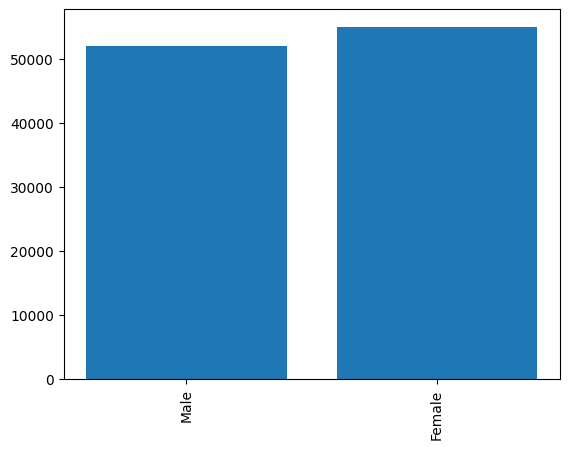

In [63]:
male_salary_mean = male_develoeprs["CompTotal"].median()
female_salary_mean = women_developers["CompTotal"].median()
count_genders = [
    ("Male", male_salary_mean),
    ("Female", female_salary_mean)
]
build_chart(count_genders, "Gender", "Number of develoeprs", "Median salary of developers by gender")

In [64]:
unemployed = data[data["CompTotal"] == 0]

In [65]:
female_unemployed = unemployed[unemployed["Gender"] == "Woman"]
male_unemployed = unemployed[unemployed["Gender"] == "Man"]

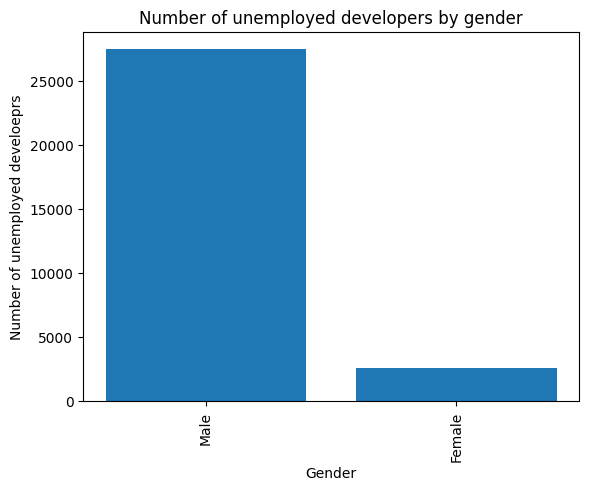

In [97]:
count_male_unemployed = male_unemployed.shape[0]
count_female_unemployed = female_unemployed.shape[0]
count_genders = [
    ("Male", count_male_unemployed),
    ("Female", count_female_unemployed)
]
build_chart(count_genders,  "Gender", "Number of unemployed develoeprs", "Number of unemployed developers by gender")

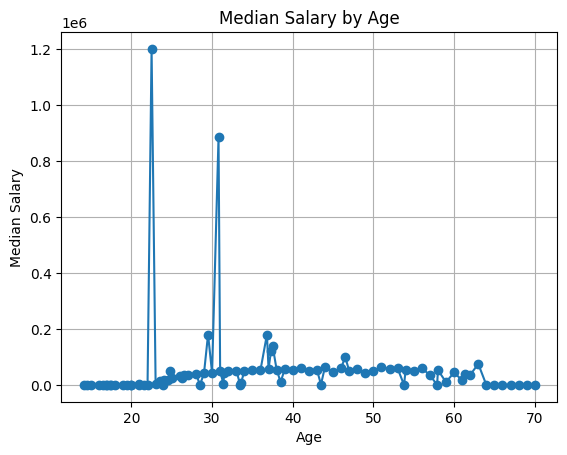

In [99]:
data["CompTotal"] = data.CompTotal.fillna(0)

data = data.sort_values(by=['Age', 'CompTotal'], ascending=[False, False])

age_filter = (data["Age"] > 14) & (data["Age"] < 71)

filtered_data = data[age_filter]

ages = list(range(15, 71, 5))

grouped = filtered_data.groupby('Age')['CompTotal'].median().reset_index()

# Create a line chart
plt.plot(grouped['Age'], grouped['CompTotal'], marker='o')
plt.xlabel('Age')
plt.ylabel('Median Salary')
plt.title('Median Salary by Age')
plt.grid(True)

# Show the chart
plt.show()